In [58]:
import numpy as np
import matplotlib.pyplot as plt
def RichardsonExtrap_Fraction(energies, scales): 
    """
    Source: Temme et Al
    Input: An array of energies scaled with different stretch factors.
    Output: Zero Error extrapolated answer
    """
    n = len(scales) - 1     # because first scale factor is going to 1 which is a trivial scaling factor
    
    #setting up all equations 
    equations = []
    for eq_num in range(n+1): 
        equation = []
        for term_num in scales: 
            term = term_num**(eq_num)
            #print(term)
            equation.append(term)
        equations.append(equation)
    #print(equations)
    
    #Now filling up equals to matrix 
    equals_to = [1]
    for i in range(1, n+1): 
        equals_to.append(0)
    #print(equals_to)
    
    #solving the system
    coeff = np.linalg.solve(equations, equals_to)
    #print(coeff)
    
    #Combine coeff with energies to get zero noise result 
    result = np.dot(coeff, energies)
    return result

def MonteCarloError(means, std_devs, scales, poly_fit = False, deg = None, sampling_size = 1000): 
    """
    Input: arrays means and standard deviations of the various scalings of noise, whether to do richardson i.e. no poly fit 
    If doing polyfit, then specify degree, sampling_size is how many times to sample from the Gaussian 
    
    Assumption: Scaled by integer values ranging from 1 to X where X>1
    
    Output: Error estimate
    """
    n = len(means)
    
    #Sampling from Gaussian for each scaling 
    all_samples = []
    debug_means = []
    for i in range(n): 
        samples = np.random.normal(means[i], std_devs[i], sampling_size)
        all_samples.append(samples)
    
    #Doing Extrapolation for all sampling_size samples (1000 if set to default)
    zero_noise_energies = []
    for j in range(sampling_size): 
        energies = []
        for k in range(n): 
            energies.append(all_samples[k][j])
            
        ##Doing either richardson or funcs 
        ###Polynomial
        if poly_fit: 
            ####making the function 
            param = np.polyfit(scales, energies, deg, w = [1/i for i in std_devs])
            f = np.poly1d(param)
            ####extrapolation
            result = f(0)
            zero_noise_energies.append(result)
            
        ###Richardson
        else: 
            result = RichardsonExtrap_Fraction(energies, scales)
            zero_noise_energies.append(result)
    
    #Returning error i.e. std 
    error = np.std(zero_noise_energies)
    return error
datas = []
def plottingCalc(means, scales):   #std_devs
    """
    Gives out data for plotting energies for extrapolation purposes
    """
    
    highest_degree = len(means) -1
    
    #scales = [1+i*0.5 for i in range(len(means))]
    
#     # Uncertainties 
#     R_uncert = MonteCarloError(means, std_devs, scales, poly_fit = False)
    
#     poly_uncerts = []
#     for i in range(1, highest_degree+1): 
#         uncert = MonteCarloError(means, std_devs,scales, poly_fit = True, deg = i)
#         poly_uncerts.append(uncert)
    
    #O energy extrap
    R_zero = RichardsonExtrap_Fraction(means, scales)
    
    poly_zero = []
    funcs = []
    for i in range(1,highest_degree+1): 
        param= np.polyfit(scales, means, i)#w=[1/j for j in std_devs]
        p = np.poly1d(param)
        funcs.append(p)
    for f in range(len(funcs)):
        zero = funcs[f](0)
        if (zero>1): zero = 1
        poly_zero.append(zero)
    
    return R_zero, poly_zero, #R_uncert poly_uncerts
def plotter(Probs, scales, lengths, title, extrap_color):
    '''
    Plots the regular data along with the extrapolated stuff
    '''
    n_length = len(lengths)
    data = []
    for i in range(n_length):
        probs = [scale_probs[i] for scale_probs in Probs]
        #std_dev = [scale_devs[i] for scale_devs in std_devs]
        scales = scales

        R_zero , poly_zero =plottingCalc(probs, scales)
        data.append([R_zero, poly_zero])
        

    global datas
    datas = data

    a = plt.figure()

    x = lengths

    for scale in range(len(Probs)): 
        plt.plot(x, Probs[scale], marker = 'o', linestyle= '--', label = str(scales[scale]))

    #Richardson
#     plt.plot(x, [data[k][0] for k in range(len(data))], marker = 'o', linestyle= '--', label = 'Richardson')

    #1st order Polynomial
    num_poly = len(scales) -4
#     for i in range(num_poly):
#         plt.plot(x, [data[k][1][i] for k in range(len(data))], marker = 'o', linestyle= '--', label = str(i+1) + 'order')
    plt.plot(x, [data[k][1][0] for k in range(len(data))], marker = 'o', linestyle= '--', color = extrap_color, label = 'Linear Extrap')

    plt.title(title)
    plt.ylabel('<I>')
    plt.xlabel('No. of Cliffords')
    plt.legend()
    return a

In [78]:
gate = [-0.9919371404111059,
 -0.974774542754856,
 -0.9755665105282936,
 -0.9762292546689184,
 -0.9548325261532935,
 -0.9420115544736061,
 -0.9407961003720435,
 -0.927602179473606,
 -0.9446471501767311,
 -0.8917440251767311]

In [79]:
pulse = [-1.001271906036106,
 -0.9757693425595435,
 -0.994556622832981,
 -0.9840055730282936,
 -0.9812589421689186,
 -0.9740309636532936,
 -0.9766169499814186,
 -0.9619244695126686,
 -0.9522354070126686,
 -0.9358979070126685]

In [83]:
scales= [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9]

In [86]:
def extrap_data(means, scales): 
    highest_degree = len(means)-1
    R_zero = RichardsonExtrap_Fraction(means, scales)

    poly_zero = []
    funcs = []
    for i in range(1,highest_degree+1): 
        param= np.polyfit(scales, means, i)#w=[1/j for j in std_devs]
        p = np.poly1d(param)
        funcs.append(p)
    for f in range(len(funcs)):
        zero = funcs[f](0)
        if (zero>1): zero = 1
        poly_zero.append(zero)
    return R_zero, poly_zero


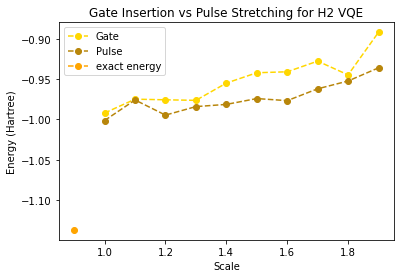

In [98]:
import matplotlib.pyplot as plt
a = plt.figure()
plt.plot(scales, gate, marker = 'o', linestyle = '--',label = 'Gate', color = 'gold')
plt.plot(scales, pulse, marker = 'o', linestyle = '--',label  = 'Pulse', color = 'darkgoldenrod')
#Extrap Data
gate_zero= extrap_data(gate, scales)[1][0]
pulse_zero = extrap_data(pulse, scales)[1][0]

gate_zero_diff = round(gate_zero +1.137, 3)
pulse_zero_diff = round(pulse_zero +1.137, 3)
# plt.plot(0, gate_zero,marker = 'o', linestyle = '--',label = r'Linear Ext (Gate)- $\Delta E = $' + str(gate_zero_diff), color = 'khaki' )
# plt.plot(0, pulse_zero, marker = 'o',linestyle = '--',label = r'Linear Ext (Pulse)- $\Delta E = $' + str(pulse_zero_diff), color = 'goldenrod' )
plt.plot(0.9, -1.137, marker = 'o', linestyle = '--',label = 'exact energy', color = 'orange')
plt.legend()
plt.xlabel('Scale')
plt.ylabel('Energy (Hartree)')
plt.title('Gate Insertion vs Pulse Stretching for H2 VQE')
plt.show()
a.savefig('VQE1', dpi = 1000)


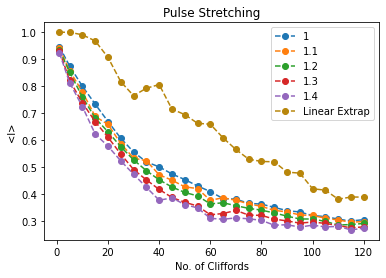

In [74]:
a = plotter(pulse, scales,length_vector, 'Pulse Stretching', 'darkgoldenrod' )
a.savefig('TQ-Pulse', dpi = 1000)
pulse_data = datas

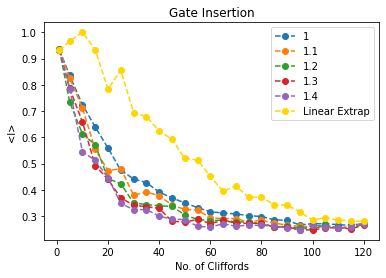

In [75]:
a = plotter(gate, scales,length_vector, 'Gate Insertion', 'gold' )
a.savefig('TQ-Gate', dpi = 1000)
gate_data = datas

In [76]:
def getLinear(data):
    '''
    Get linear extrap data
    '''
    boxes = len(data)
    linear = []
    for i in range(boxes):
        linear.append(data[i][1][0])
    return linear

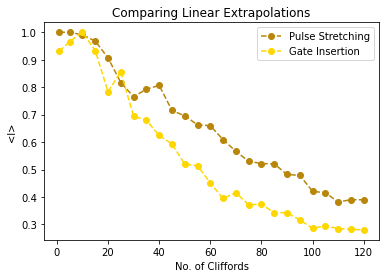

In [77]:
a = plt.figure()
plt.plot(length_vector, getLinear(pulse_data), color = 'darkgoldenrod', marker= 'o', linestyle = '--', label = 'Pulse Stretching')
plt.plot(length_vector, getLinear(gate_data), color = 'gold', marker= 'o', linestyle = '--', label = 'Gate Insertion')
plt.title('Comparing Linear Extrapolations')
plt.ylabel('<I>')
plt.xlabel('No. of Cliffords')
plt.legend()
a.savefig('TQ-ExtrapComp', dpi = 1000)

In [82]:
scales

[1, 1.1, 1.2, 1.3, 1.4]

-1.0813340510704326